# Data Eng: Week 1 Practical

In this practical you will complete three functions describing an extract, transform and load process as defined in the theory.

You have been tasked by a grocery store to prepare data for analytic work that they wish to do. They capture daily sales for customers in an `orders` table and keep track of their customer details in a `user` table.

There is a batch process that performs a dump of these tables as `CSV` files on a daily basis - you will process data for one such day in this practical.

**Note**: In reality, the dump could already be performed by your pipeline and you would call this your *'extract'* stage. For the purposes of this example, we consider the extract to be the reading of the CSV files, i.e. the CSV files are our sources.

---

## Overview

 > Implement a basic ETL pipeline that reads a CSV, processes it and writes refined/prepared data to a CSV.

The stages of the pipeline include

Extract (read) $\mapsto$   Transform (join & filter) $\mapsto$ Load (write)

and run in series, and produce the desired output (see the requirements below).

A table of what is expected in each stage is provided below:

|Stage| Description/Hints |
|---|-----|
|Extract | Pandas provides you with the relevant functions to import CSVs via a single reusable function |
|Transform | Clean and join the data into a single output as specified in the requirements |
| Load | Write out to persistent storage (in this case, another CSV file) |


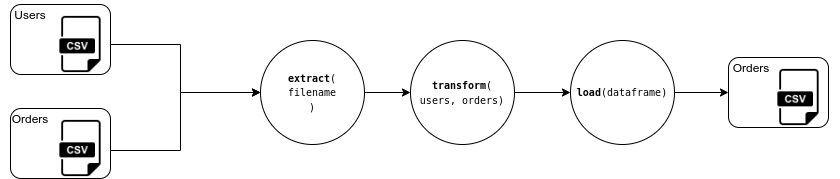

---

## Requirements

The requirements presented to you, the data engineer, are dervied from the user story presented below --- "A user story is an informal, general explanation of a software feature written from the perspective of the end user"  [Atlassian](https://www.atlassian.com/agile/project-management/user-stories).

#### User Story

> As a business intelligence user, I wish to build a graph on a dashboard to better understand the breakdown of the number of purchases (irrespective of the number of items in each purchase) each gender made on a particular day.

##### Output Requirement

A dataset formatted as:

|date| gender | total_purchases |
|--|--|--|
|20220101| male | 20 |
| 20220101 | female | 32 |
| 20220102 | male | 41 |

Where each day is presented across two rows, one for 'M' and one for 'F'. That is, the data is aggregated/grouped (sum) per day, and per gender.



In [1]:
# setup  your python environment by installing the necessary packages
# we run this command using the bash operator prefix `!`, which executes bash
# code on the underlying machine (in this case, this Colab notebook is running
# in a virtual machine in the cloud) - see
# https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj

! pip install --quiet pandas

Our pipeline dependencies include the [pandas](https://pandas.pydata.org/) library.
Although primarly an analysis library, it is useful for workloads in which the data being processed is small.

In [2]:
# import the python packages

import pandas as pd

In [3]:
# get the orders file using bash prefix - we are suppressing the output with the `-s` flag.
# remove that if you want to see your file being downloaded
! curl -s https://storage.googleapis.com/bdt-beam/orders_v_2022.csv  -o orders.csv

# get the users file... these files represent two tables in a data base (already extracted - a data dump)
# similarly, you can use other unix based commands like `ls` to list the folder beneath the notebook after you have downloaded the files.
! curl -s https://storage.googleapis.com/bdt-beam/users_v.csv  -o users.csv

Now that we have the files, let's write the python read function, which we will call `extract`

## Extract
Complete the extract function for the users and orders files.

_HINT: if you get `ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2`, have a look at the first 10 lines of the file and see what is different..._

In [ ]:
###
# this function is to be completed by the student
##
def extract(csv_filename: str, delimiter: str=',') -> pd.DataFrame:
    """
    Extract data from a file and structure it into a pandas dataframe
    
    Args:
        csv_filename (str): name of csv file
        delimiter (str): default ','
    
    Return:
        pandas.DataFrame: A pandas dataframe with header as defined by the csv file
    """
    try:
        # Read the CSV file, skipping rows that start with '#' (comments)
        df = pd.read_csv(csv_filename, delimiter=delimiter, comment='#')
        print(f"Successfully extracted {len(df)} rows from {csv_filename}")
        return df
    except FileNotFoundError:
        print(f"Error: File '{csv_filename}' not found.")
        return None
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

In [ ]:
## --- begin: student to complete subsequent code

# Complete the function call to read users.csv into a dataframe
df_users = extract('users.csv')
if df_users is not None:
    print(f"Users DataFrame shape: {df_users.shape}")
    print("\nFirst 3 rows of users:")
    print(df_users.head(3))
# --- end:

In [ ]:
## --- begin: student to complete subsequent code

# Complete the function call to read orders.csv into a dataframe
df_orders = extract()
if df_orders is not None:
    print(f"Orders DataFrame shape: {df_orders.shape}")
    print("\nFirst 3 rows of orders:")
    print(df_orders.head(3))
## --- end:

## Transform

Complete the transform function. You will need to perform a join and a filter to return the data set in the required format.

**Hint:**
  * Using the commands
```bash
df_users.head(3)
```
and
```bash
df_orders.head(3)
```
reveals the headers and content of each dataframe. You will notice that `user_id` is a common field between the files. You can use this column to combine the files so that the user's gender and their orders are available for processing.
  * Use Google to find out how a `join` is performed in pandas (getting good at asking the right questions is important)
  * Use Google to understand how to filter/subset a dataframe to specific columns.

In [ ]:
def transform(users: pd.DataFrame, orders: pd.DataFrame) -> pd.DataFrame:
  """
  Take two dataframes, and produce a dataset

  Args:
     users: a dataframe of user information
     orders: a dataframe of user orders

  Return:
     pandas.DataFrame: A pandas dataframe with header as defined by user
     requirements
  """
  try:
      # Merge the users and orders dataframes on 'user_id'
      merged_df = pd.merge(users, orders, on='user_id', how='inner')

      # Group by 'user_id' and count the number of purchases
      result_df = merged_df.groupby('user_id').size().reset_index(name='purchase_count')

      return result_df
  except Exception as e:
      print(f"Error during transformation: {e}")
      return None
  ## --- begin: student to complete subsequent code

  # perform the groupby operation and be sure to subset - `count` will
  # count the purchases.

  # return the resulting dataframe (Hint: You may need to reset the index)

  ## --- end:



In [ ]:
## --- begin: student to complete subsequent code

# Complete the function call to transform your dataframes
# Use head() to view the resulting dataframe

## --- end:

def extract() -> pd.DataFrame:
    """
    Extract data from a file and structure it into a pandas dataframe
    
    Return:
        pandas.DataFrame: A pandas dataframe with header as defined by the csv file
    """
    try:
        # Read the CSV file, skipping rows that start with '#' (comments)
        df = pd.read_csv('orders.csv', delimiter=',', comment='#')
        print(f"Successfully extracted {len(df)} rows from orders.csv")
        return df
    except FileNotFoundError:
        print("Error: File 'orders.csv' not found.")
        return None
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

### Load

In this example, our load step only writes back to the filesystem of the virtual machine. For this we want to write the dataframe to disk.



In [ ]:
def load(transformed: pd.DataFrame, filename, delimiter=',') -> None:
  """
  Write the dataframe to a csv with specified delimeter

  Args:
    transformed: a dataframe with columns ['date_purchased','gender','total_purchases']
    filename: a filename for the output CSV
    delimeter: an optional delimiter signifying column boundaries in the CSV file
  Return:
    None
  """
  ## --- begin: student to complete subsequent code - remember the try/except

  try:
      # Write the dataframe to a CSV file with the specified delimiter
      transformed.to_csv(filename, index=False, sep=delimiter)
      print(f"Data successfully loaded to {filename}")
  except Exception as e:
      print(f"Error writing to file: {e}")
  ## --- end


## Pipeline

Run your pipeline end to end

Expected output (use `!head output.csv`):


| date_purchased | gender | total_purchases |
| ---- | ---- | ---- |
2000-01-01 | female | 73 |
2000-01-01 | male | 74 |
2000-01-02 | female | 4 |
2000-01-02 | male | 10 |
2000-01-03 | female | 4 |
2000-01-03 | male | 12 |
2000-01-04 | female | 163 |
2000-01-04 | male | 159 |
2000-01-05 | female | 204 |
```

In [ ]:
## --- begin: student to complete subsequent code - remember the try/except

# Run your pipeline here using the functions you have created
df_users = extract('users.csv')
df_orders = extract('orders.csv')

if df_users is not None and df_orders is not None:
    transformed = transform(df_users, df_orders)
    if transformed is not None:
        load(transformed, 'transformed_data.csv')

## --- end

